---

<h1 style="text-align: center;font-size: 40px;">Food Shortage in Africa - Remedies</h1>

---

<center><img src="https://media.istockphoto.com/photos/assorted-vegetables-picture-id1048954912?s=612x612" width="500" height="600"></center>

---

# Explorations

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:
# Import the supply data
supply = pd.read_csv(r"Africa Food Supply (2004 - 2013).csv - Africa Food Supply (2004 - 2013).csv.csv")

In [3]:
# Import the production data
production = pd.read_csv("Africa Food Production (2004 - 2013).csv - Africa Food Production (2004 - 2013).csv.csv")

In [4]:
# Inspect the production data
production

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0
23106,Zimbabwe,Crustaceans,2010,0
23107,Zimbabwe,Crustaceans,2011,0
23108,Zimbabwe,Crustaceans,2012,0


In [5]:
# Inspect the supply data
supply

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197


In [6]:
# Inspect the dimension of production data
production.shape

(23110, 4)

In [7]:
# Inspect the dimension of supply data
supply.shape

(450, 3)

In [8]:
# Inspect the different countries in the production data
production["Country"].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
       'Congo', "Cote d'Ivoire", 'Djibouti', 'Egypt', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Swaziland', 'Togo',
       'Tunisia', 'Uganda', 'United Republic of Tanzania', 'Zambia',
       'Zimbabwe'], dtype=object)

### All the countries are African countries

In [9]:
# Inspect the number of different countries in the production data
production["Country"].nunique()

45

In [10]:
# Inspect the different food items produced in Africa
production["Item"].unique()

array(['Wheat and products', 'Rice (Milled Equivalent)',
       'Barley and products', 'Maize and products', 'Oats',
       'Sorghum and products', 'Cereals, Other', 'Potatoes and products',
       'Sugar beet', 'Sugar (Raw Equivalent)', 'Honey', 'Beans', 'Peas',
       'Pulses, Other and products', 'Nuts and products',
       'Groundnuts (Shelled Eq)', 'Sunflower seed',
       'Rape and Mustardseed', 'Cottonseed',
       'Olives (including preserved)', 'Groundnut Oil',
       'Sunflowerseed Oil', 'Rape and Mustard Oil', 'Olive Oil',
       'Oilcrops Oil, Other', 'Tomatoes and products', 'Onions',
       'Vegetables, Other', 'Oranges, Mandarines',
       'Lemons, Limes and products', 'Grapefruit and products',
       'Citrus, Other', 'Bananas', 'Apples and products', 'Dates',
       'Grapes and products (excl wine)', 'Fruits, Other', 'Pimento',
       'Wine', 'Beer', 'Beverages, Alcoholic', 'Bovine Meat',
       'Mutton & Goat Meat', 'Pigmeat', 'Poultry Meat', 'Meat, Other',
       'Of

In [11]:
# Inspect the number of the different food items produced in Africa
production["Item"].nunique()

94

In [12]:
# Inspect the different countries in the supply data
supply["Country"].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
       'Congo', "Cote d'Ivoire", 'Djibouti', 'Egypt', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Swaziland', 'Togo',
       'Tunisia', 'Uganda', 'United Republic of Tanzania', 'Zambia',
       'Zimbabwe'], dtype=object)

### Same countries are in both the production and supply dataset. The data is good for analysis

In [13]:
# Inspect the number of different countries in the supply data
supply["Country"].nunique()

45

# Visualisations

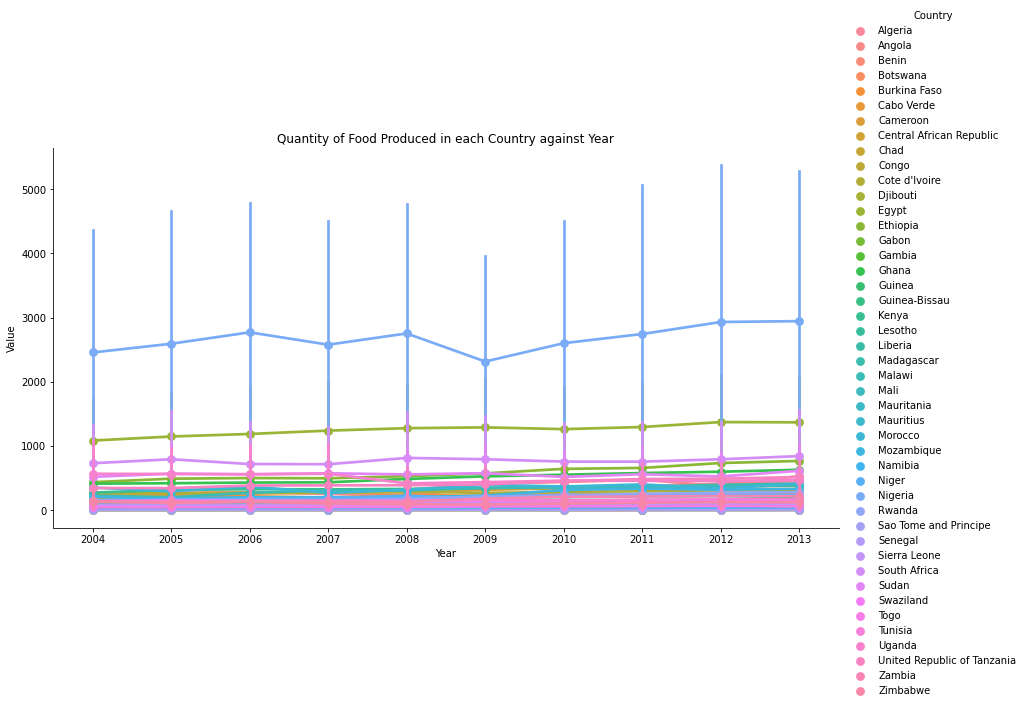

In [14]:
# Graph of Quantity of Food Produced in each Country against Year
sns.catplot(x="Year", y="Value", hue="Country", kind="point", data=production, height=6, aspect=2)
plt.title("Quantity of Food Produced in each Country against Year")
plt.savefig("1.png")
plt.show()

In [15]:
# Inspect the details of the most item produced in a year
production[production["Value"]==production["Value"].max()]

,Country,Item,Year,Value
15448,Nigeria,Cassava and products,2012,54000


### The most food item produced in a single year is Cassava which happened in Nigeria in the year 2012 with a quantity of 54,000

In [16]:
# Inspect the total quantity of food items produced from 2004 to 2013
total_production = pd.DataFrame(production.groupby("Item")["Value"].sum())
total_production

,Value
Item,
"Alcohol, Non-Food",3652
Apples and products,21706
"Aquatic Animals, Others",13
Aquatic Plants,1378
Bananas,153785
...,...
Tomatoes and products,172192
"Vegetables, Other",410403
Wheat and products,229875


In [17]:
# Inspect the most food item produced from 2004 to 2013
total_production[total_production["Value"]==total_production["Value"].max()]

,Value
Item,
Cassava and products,1118948


### The total quantity of cassava produced throughout all the years is 1,118,948

In [18]:
# Inspect the average quantity of food items produced from 2004 to 2013 in each country
mean_production = pd.DataFrame(production.groupby(["Country", "Year"])["Value"].mean())
mean_production

Value
Country  Year            
Algeria  2004  267.862069
         2005  270.120690
         2006  283.051724
         2007  254.534483
         2008  238.637931
...                   ...
Zimbabwe 2009   89.906250
         2010  105.890625
         2011  117.984375
         2012  127.703125
         2013  123.656250

[450 rows x 1 columns]

In [19]:
# Inspect the mean quantity of the most food item produced from 2004 to 2013
mean_production[mean_production["Value"]==mean_production["Value"].max()]

,,Value
Country,Year,
Nigeria,2013,2944.770492


In [20]:
# Inspect the mean quantity of food produced from 2004 to 2013
mean_item = pd.DataFrame(production.groupby(["Item"])["Value"].mean())
mean_item

,Value
Item,
"Alcohol, Non-Food",45.650000
Apples and products,271.325000
"Aquatic Animals, Others",0.081250
Aquatic Plants,11.677966
Bananas,466.015152
...,...
Tomatoes and products,478.311111
"Vegetables, Other",912.006667
Wheat and products,851.388889


In [21]:
# Inspect the food item with the highest mean quantity produced from 2004 to 2013
mean_item[mean_item["Value"]==mean_item["Value"].max()]

,Value
Item,
Cassava and products,3390.751515


In [22]:
# Inspect the most food item produced in Nigeria from 2004 to 2013
a = production[production["Country"]=="Nigeria"]
a

,Country,Item,Year,Value
15380,Nigeria,Wheat and products,2004,62
15381,Nigeria,Wheat and products,2005,66
15382,Nigeria,Wheat and products,2006,71
15383,Nigeria,Wheat and products,2007,44
15384,Nigeria,Wheat and products,2008,53
...,...,...,...,...
15985,Nigeria,"Molluscs, Other",2009,3
15986,Nigeria,"Molluscs, Other",2010,3
15987,Nigeria,"Molluscs, Other",2011,4
15988,Nigeria,"Molluscs, Other",2012,4


In [23]:
# Inspect the total quantity of the most food item produced from 2004 to 2013
b = pd.DataFrame(a.groupby("Item")["Value"].sum())
b

,Value
Item,
Beer,16819
"Beverages, Fermented",93839
Bovine Meat,3376
"Butter, Ghee",111
Cassava and products,452881
...,...
Sweet potatoes,32163
Tomatoes and products,17632
"Vegetables, Other",83335


In [24]:
# Inspect the most food item produced from 2004 to 2013
b[b["Value"]==b["Value"].max()]

,Value
Item,
Cassava and products,452881


In [25]:
# Total quantity of food item produced in each country
df1 = production['Country'].value_counts().sort_index().index
df2 = production.groupby('Country')['Value'].sum()

trace = go.Choropleth(
    locationmode = 'country names',
    locations = df1,
    text = df1,
    colorscale = 'Rainbow',
    z = df2.values
)
df3 = [trace]
layout = go.Layout(
    title = "Total Quantity of Food Item Produced in Each Country")

fig = go.Figure(data = df3, layout = layout)
iplot(fig)

In [26]:
# Mean quantity of food item produced in each country
df1 = production['Country'].value_counts().sort_index().index
df2 = production.groupby('Country')['Value'].mean()

trace = go.Choropleth(
    locationmode = 'country names',
    locations = df1,
    text = df1,
    colorscale = 'Rainbow',
    z = df2.values
)
df3 = [trace]
layout = go.Layout(
    title = "Mean Quantity of Food Item Produced in Each Country")

fig = go.Figure(data = df3, layout = layout)
iplot(fig)

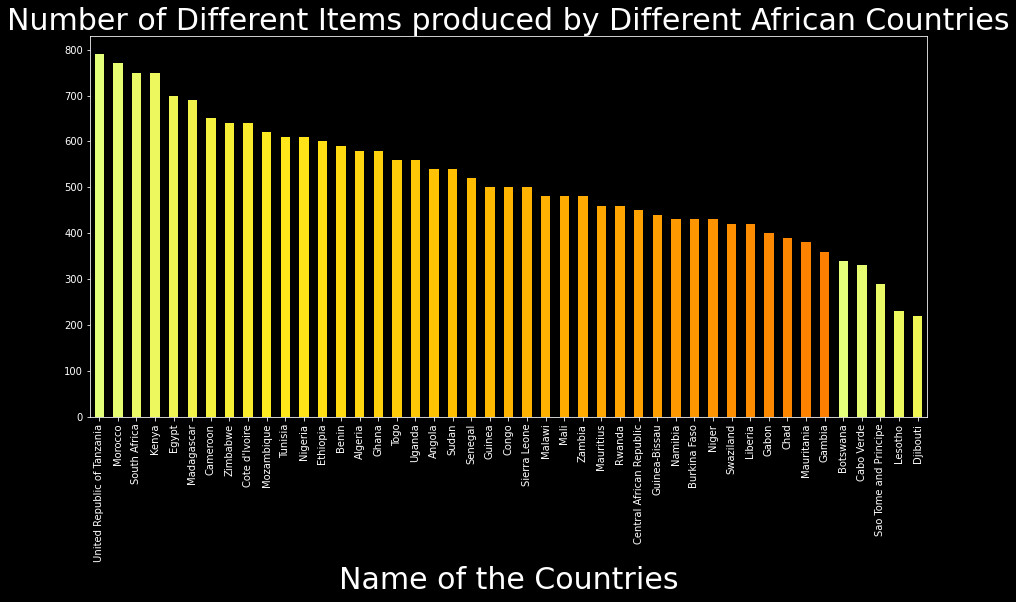

In [27]:
# Number of Different Items produced against Country
color = plt.cm.Wistia(np.linspace(0, 1, 40))
plt.style.use('dark_background')
production['Country'].value_counts().sort_values(ascending = False).plot.bar(figsize = (15, 7), color = color)
plt.title('Number of Different Items produced by Different African Countries', fontsize = 30)
plt.xlabel('Name of the Countries', fontsize = 30)
plt.savefig("2.png")
plt.show()

### United Republic of Tanzania produced many more different food items than any other country

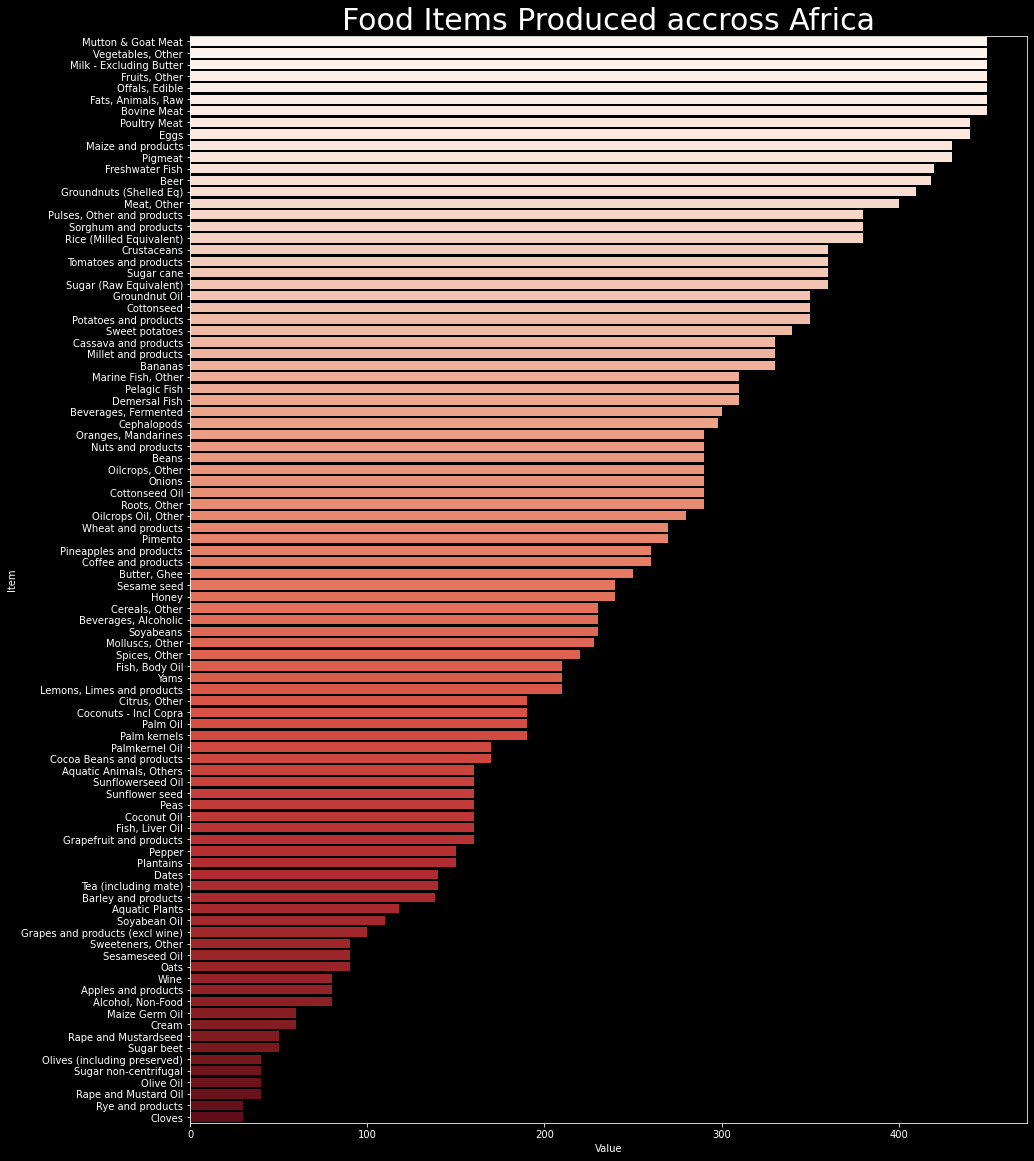

In [28]:
# Food Items Produced accross Africa
plt.style.use("dark_background")
items = pd.DataFrame(production.groupby("Item")["Value"].agg("count").sort_values(ascending=False))
plt.rcParams['figure.figsize'] = (15, 20)
sns.barplot(x = items.Value, y = items.index, data = items, palette = 'Reds')
plt.gca().set_title("Food Items Produced accross Africa", fontsize = 30)
plt.savefig("3.png")
plt.show()